In [19]:
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import csv
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
directory = '/home/krebs/mounts/share/Vicon_Data/Vicon/OML/Bimanual_Manipulation_Dataset_Motion_Primitives/1723/BimanualSegmentation/Evaluation'
prediction=[]
true=[]
steps = 1000
no_action = [0] * (steps)
uni_l = [0] * (steps)
loosely = [0] * (steps)
tightly = [0] * (steps)
no_dir = 0
for dir in os.listdir(directory):
    no_dir += 1
    #print(dir)
    with open(directory + "/" + dir + "/prediction.csv", newline='') as csvfile:
        prediction = list(csv.reader(csvfile))
    with open(directory + "/" + dir + "/true.csv", newline='') as csvfile:
        true = list(csv.reader(csvfile))  
    #print(dir)    
    data = prediction
    #print(len(data)/steps)
    for i in range(steps):
        
        category = data[int(np.floor(i*len(data)/steps))]
        #print(int(i*np.floor(len(data)/steps)))
        if category[0] == "no_motion": 
            no_action[i] += 1
        if category[0] == "unimanual_left": 
            uni_l[i] += 1
        if category[0] == "loosely_coupled":
            loosely[i] += 1
            #print("true")
        if category[0] == "tightly_coupled_sym" or category[0] == "tightly_coupled_asym_r" or category[0] == "tightly_coupled_asym_l":
            #print("true")
            tightly[i] += 1
            
    #break


        

    

/home/krebs/reposMMM/mmm/development/scripts/python/BimanualClassification/venv/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.


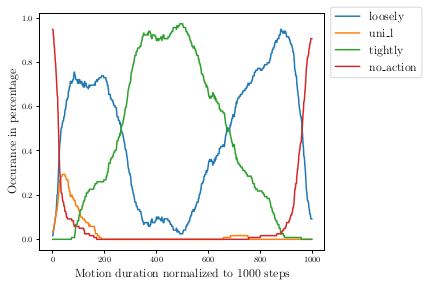

In [20]:
x = np.linspace(0, steps, steps)
#import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size': 8,
    'text.usetex': True,
    'pgf.rcfonts': True,
})
fig = plt.figure(1)
plt.plot([x / no_dir for x in loosely], label="loosely")
plt.plot([x / no_dir for x in uni_l], label="uni_l")
plt.plot([x / no_dir for x in tightly], label="tightly")
plt.plot([x / no_dir for x in no_action], label="no_action")
plt.xlabel('Motion duration normalized to 1000 steps', fontsize = 12)
plt.ylabel('Occurance in percentage', fontsize = 12)
#plt.title('Distribution of categories for ground truth data', fontsize = 12)
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), fontsize = 12)
plt.show()
fig.tight_layout()
fig.savefig("TransitionsPlot.pdf", dpi=400)

### Transition matrix


Text(0.5, 1.0, 'transition matrix: ground truth')

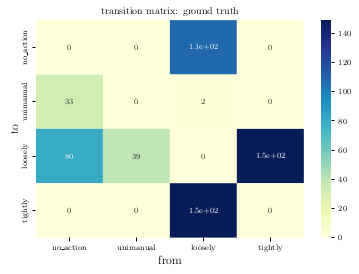

In [21]:
prediction=[]
true=[]
transitions = np.zeros((4,4))

def getIndex(category):
    if category == "no_motion":
        return 0
    elif category == "unimanual_left":
        return 1
    elif category == "loosely_coupled":
        return 2
    elif category == "tightly_coupled_sym" or category == "tightly_coupled_asym_r" or category == "tightly_coupled_asym_l":
        return 3
    else:
        return -1
    
    
    
    
for dir in os.listdir(directory):
    no_dir += 1
    with open(directory + "/" + dir + "/prediction.csv", newline='') as csvfile:
        prediction = list(csv.reader(csvfile))
    with open(directory + "/" + dir + "/true.csv", newline='') as csvfile:
        true = list(csv.reader(csvfile))  
    data = prediction
    first = True
    current = 0
    for i in range(1, len(data)):
        if data[i] != data[i-1]:
            transitions[getIndex(data[i][0]),getIndex(data[i-1][0])] += 1
            
#print(transitions)
y_axis_labels = ["no_action","unimanual","loosely","tightly"]
#transitions[3,3] = 0
map = sn.heatmap(transitions, xticklabels=y_axis_labels, yticklabels=y_axis_labels, annot=True, cmap="YlGnBu")
map.set_xlabel("from", fontsize = 12)
map.set_ylabel("to", fontsize = 12)
map.set_title("transition matrix: ground truth")

In [22]:
test = np.zeros((4,4))
test[1,0] = 1
print(test)

[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
